In [ ]:
!pip install pandas numpy matplotlib seaborn yfinance pandas-datareader

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime

data=yf.download('AMZN',start='2022-01-01',end = '2024-01-01') #downloading data of Amazon using yfinance
data.head()



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2022-01-03,170.404495,170.703506,166.160507,167.550003,63520000
2022-01-04,167.522003,171.399994,166.349503,170.438004,70726000
2022-01-05,164.356995,167.126495,164.356995,166.882996,64302000
2022-01-06,163.253998,164.800003,161.936996,163.450500,51958000
2022-01-07,162.554001,165.243500,162.031006,163.839005,46606000


In [29]:
print(data.describe())


Price        Close        High         Low        Open        Volume
Ticker        AMZN        AMZN        AMZN        AMZN          AMZN
count   501.000000  501.000000  501.000000  501.000000  5.010000e+02
mean    123.740526  125.599887  121.839264  123.768300  6.747336e+07
std      21.661290   21.798851   21.538422   21.717834  2.959026e+07
min      81.820000   83.480003   81.430000   82.800003  2.237840e+07
25%     104.300003  106.099998  102.519997  104.190002  4.943090e+07
50%     125.779999  127.360001  123.980003  125.250000  5.998930e+07
75%     139.985992  143.229996  138.639999  140.619995  7.456600e+07
max     170.404495  171.399994  167.868500  170.438004  2.726620e+08


In [31]:
print(data.isnull().sum()) 

Price   Ticker
Close   AMZN      0
High    AMZN      0
Low     AMZN      0
Open    AMZN      0
Volume  AMZN      0
dtype: int64


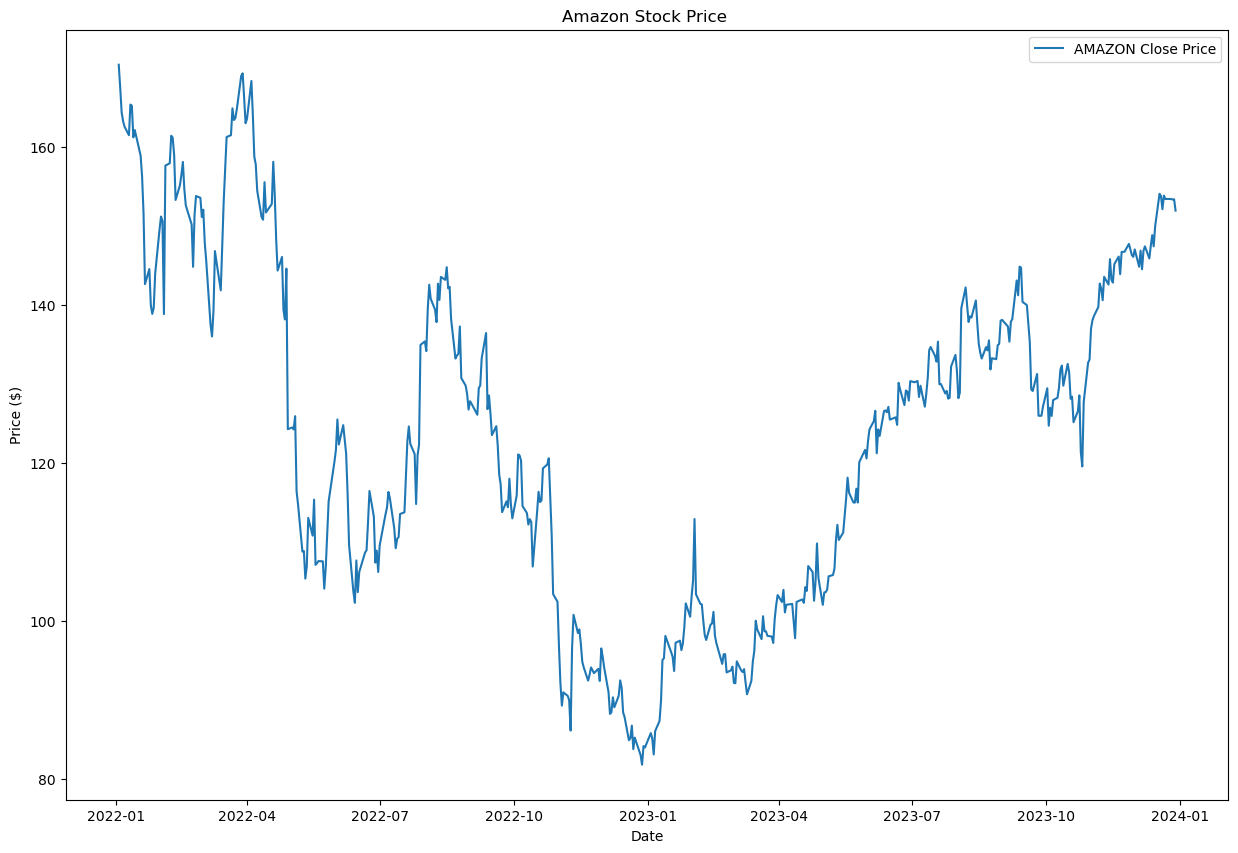

In [41]:
# to see the history of closing price
plt.figure(figsize=(15,10))
plt.plot(data['Close'],label='AMAZON Close Price')
plt.title('Amazon Stock Price ')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

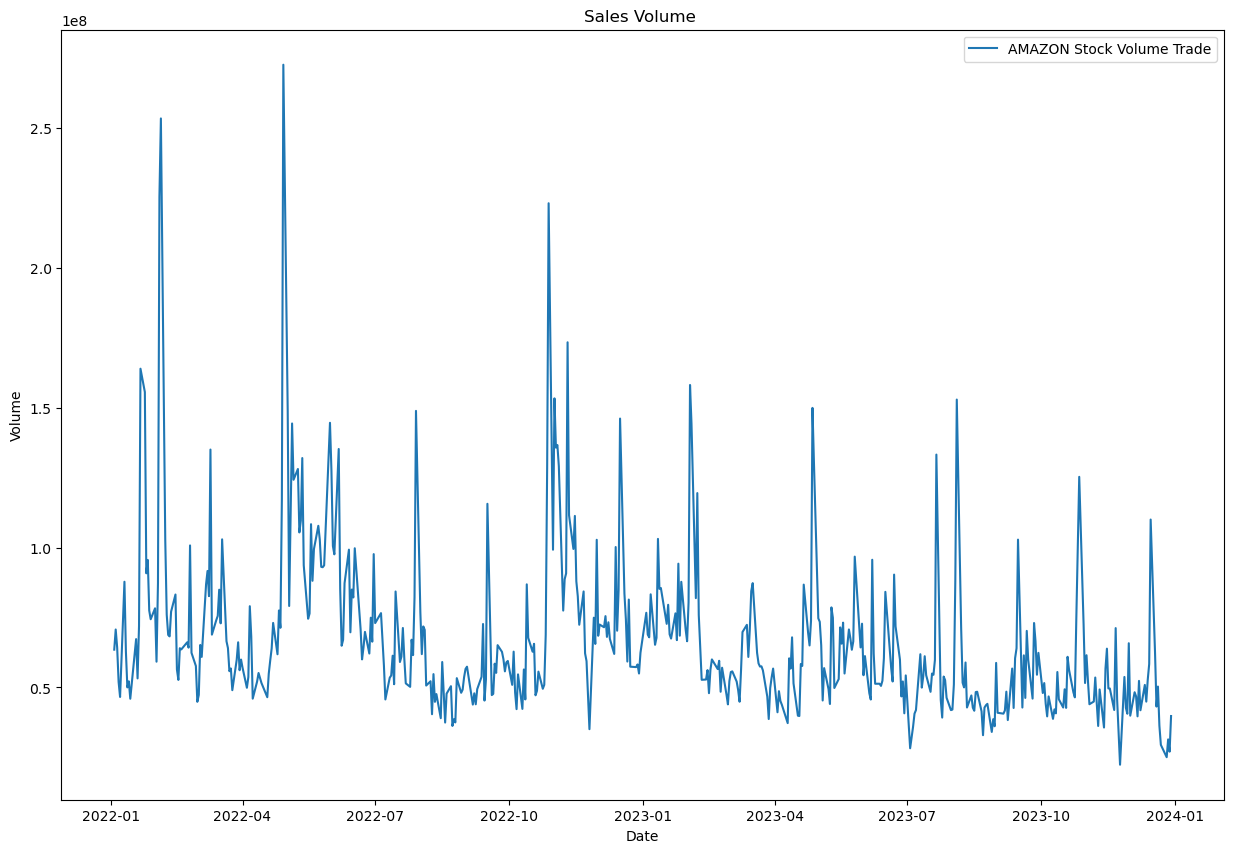

In [47]:
# to see the total volume of stock traded each day
plt.figure(figsize=(15,10))
plt.plot(data['Volume'],label='AMAZON Stock Volume Trade')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Sales Volume ')
plt.legend()
plt.show()

<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

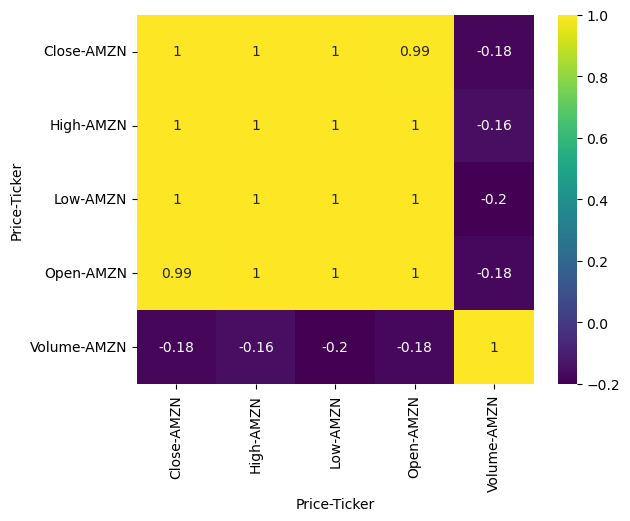

In [79]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [81]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Close'  #we want to predict the closing values

features_data = data[features].values
target_data = data[target].values

In [83]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(features_data)
scaled_target = scaler.fit_transform(target_data.reshape(-1, 1))

In [85]:
#making time stamps for lstm model
def create_sequences(data, target, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Past 'seq_length' days
        y.append(target[i+seq_length])  # Next day's 'Close' price
    return np.array(X), np.array(y)

seq_length = 60  # Use 60 days of history
X, y = create_sequences(scaled_data, scaled_target, seq_length)

In [87]:
split = int(0.8 * len(X))  # 80% training, 20% testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
!pip install tensorflow

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

model = Sequential([
    Input(shape=(seq_length, len(features))), 
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])

In [153]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.1461 - val_loss: 0.0096
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0156 - val_loss: 0.0247
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0119 - val_loss: 0.0046
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0075 - val_loss: 0.0104
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0073 - val_loss: 0.0048
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0073 - val_loss: 0.0074
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0065 - val_loss: 0.0044
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0055 - val_loss: 0.0035
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0055 - val_loss: 0.0056
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0

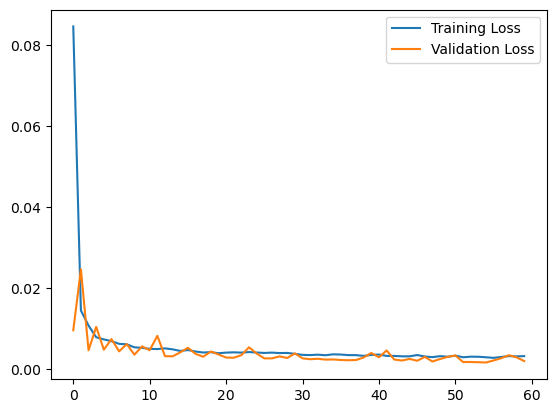

In [155]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [157]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale
y_test_actual = scaler.inverse_transform(y_test)    # Actual values

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


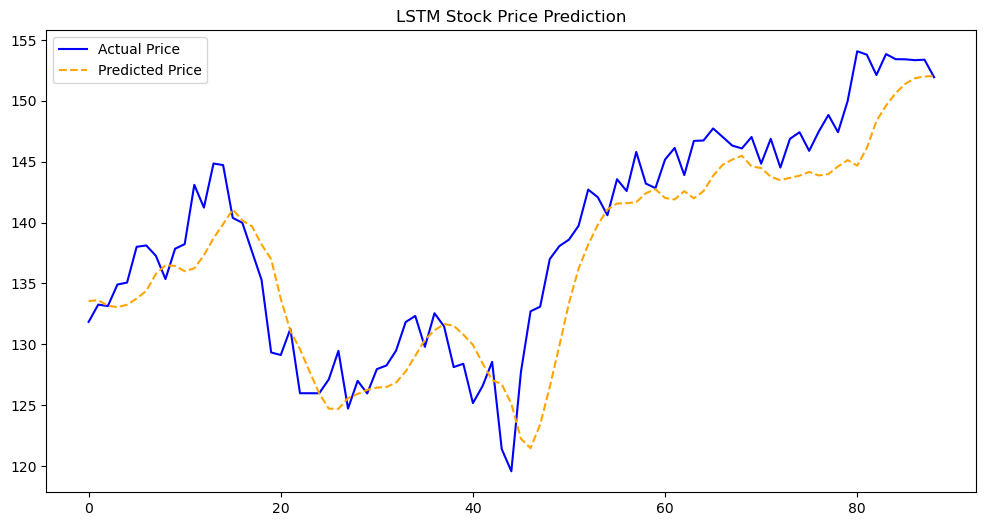

In [159]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='orange', linestyle='--')
plt.legend()
plt.title('LSTM Stock Price Prediction')
plt.show()

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
r2 = r2_score(y_test_actual, predictions)

print(f"""
Performance Metrics:
- Mean Absolute Error (MAE): ${mae:.2f}
- Root Mean Squared Error (RMSE): ${rmse:.2f}
- R² Score: {r2:.2%}
""")


Performance Metrics:
- Mean Absolute Error (MAE): $3.08
- Root Mean Squared Error (RMSE): $3.93
- R² Score: 80.75%



In [163]:
model.save('stock_prediction_lstm.keras') 


In [183]:
#sample prediction

import numpy as np
import tensorflow as tf
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler


model = tf.keras.models.load_model('stock_prediction_lstm.keras')


features = ['Open', 'High', 'Low', 'Close', 'Volume']
seq_length = 60  


new_data = yf.download('AMZN', period='70d')  # Get slightly more than seq_length
new_data = new_data[features]  # Keep only relevant columns


scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_data)


last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, len(features))


predicted_scaled = model.predict(last_sequence)


dummy_features = np.zeros((1, len(features)-1))  # For other features
prediction_reshaped = np.concatenate([dummy_features, predicted_scaled], axis=1)
predicted_price = scaler.inverse_transform(prediction_reshaped)[0, -1]

print(f"Predicted Close Price for Next Day: ${predicted_price:.2f}")


[*********************100%***********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Predicted Close Price for Next Day: $45237139.72
